In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
Air_plant_center = np.array([0, 0, 0])
Oil_q = 850
Air_weight = 3000

box1_to_box2 = 1.1
box2_to_eg = 1.8
box3_to_eg = 1.7
box4_to_eg = 1.5
box5_to_eg = 1.6
box6_to_box5 = 1.1

air_plant_par_data = pd.read_excel('Air_plant_msg.xlsx')
Q_1_data_Oil = pd.read_excel('Q_1_data.xlsx', sheet_name="Oil")
Q_1_data_air_theta = pd.read_excel('Q_1_data.xlsx', sheet_name="air_theta")

In [3]:
Q_1_data_Oil.head()

time    1         2    3    4    5    6
0     1  0.0  0.000000  0.0  0.0  0.0  0.0
1     2  0.0  0.000357  0.0  0.0  0.0  0.0
2     3  0.0  0.000714  0.0  0.0  0.0  0.0
3     4  0.0  0.001071  0.0  0.0  0.0  0.0
4     5  0.0  0.001428  0.0  0.0  0.0  0.0

In [4]:
class oil_box:
    def __init__(self, index, center_x, center_y, center_z, size_x, size_y, size_z, init_oil):
        self.index = index
        self.center_x = center_x
        self.center_y = center_y
        self.center_z = center_z
        self.size_x = size_x
        self.size_y = size_y
        self.size_z = size_z
        # 初始油的质量
        self.init_oil = init_oil * Oil_q
        # 先有的油的质量
        self.now_oil = init_oil * Oil_q
        self.position = np.array([center_x - 0.5 * size_x, center_y - 0.5 * size_y, center_z - 0.5* size_z])
        self.center_list = []

In [5]:
# air_plant_par_data.head()
oil_box_list = []
for i in range(len(air_plant_par_data)):
    temp_series = air_plant_par_data.loc[i]
    oil_box_list.append(oil_box(i+1 ,temp_series.x, temp_series.y, temp_series.z, temp_series.size_x, temp_series.size_y, temp_series.size_z, temp_series.init_oil))
print(oil_box_list[0].center_x)

8.91304348


In [6]:
# test_array_0 = np.array([1, 2, 3])
# test_array_1 = np.array([3, 4, 5])
# test_array_2 = test_array_0 + test_array_1
# print(test_array_2) 
record_cal = []
for i in range(9):
    record_cal.append(0)
    

In [7]:
def get_S(oil_weight, b):
    oil_v = oil_weight / Oil_q
    S = oil_v/ b
    return S

In [8]:
def get_theta(oil_box, now_S):
    a = oil_box.size_x
    b = oil_box.size_y
    c = oil_box.size_z
    now_h = now_S / a 
    theta_1 = math.atan(2 * now_S / a ** 2)
    theta_2 = math.atan(c ** 2 / 2 * now_S)
    theta_3 = math.atan(2*(c * a - now_S)/ (a ** 2))
    theta_4 = math.atan((c ** 2)/ 2 * (c * a - now_S))
    theta_array = [theta_1, theta_2, theta_3, theta_4]
    return theta_array        

In [9]:
# def get_center(status, theta, theta_array, now_S, oil_box):
#    center_array = np.array([0, 0 ,0])
#    a = oil_box.size_x
#    b = oil_box.size_y
#    c = oil_box.size_z
#    now_h = now_S / a
   
#    if theta == 0:
#       # 为矩形
#       center_x = a / 2
#       center_y = b / 2
#       center_z = now_h / 2
#       center_array = np.array([center_x, center_y, center_z])
#    elif theta > 0:
#       tan_theta = math.tan(abs(theta/180)*math.pi)
#       if now_h < c / 2 and theta >= theta_array[0] and theta <= theta_array[1]:
#              print("正三角形")
#              temp_x = math.sqrt(2 * now_S / tan_theta)
#              center_array = np.array([temp_x / 3, b / 2, temp_x * tan_theta / 3])
#       elif (now_h < c /2 and theta < theta_array[0]) or (now_h > c/2 and theta > theta_array[2]):
#              print("正梯形_1")
#              temp_x = now_S / a - a * tan_theta / 2
#              factor_0 = a * tan_theta * a / 2
#              factor_1 = temp_x * a
#              temp_center_0 = np.array([a / 3, b / 2, temp_x / 3]) * factor_0
#              temp_center_1 = np.array([a / 2, b / 2, temp_x / 2]) * factor_1
#              center_array = (temp_center_0 + temp_center_1) / now_S
#       elif (now_h < c / 2 and theta > theta_array[1]) or (theta > theta_array[3] and now_h > c / 2):
#              print("正梯形_2")
#              temp_x = now_S / c - c / (tan_theta * 2)
#              factor_0 = (c ** 2) / (tan_theta * 2)
#              factor_1 = temp_x * c
#              temp_center_0 = np.array([temp_x + c / (3 * tan_theta), b / 2, c / 3]) * factor_0
#              temp_center_1 = np.array([temp_x / 2, b / 2, c / 2]) * factor_1
#              center_array = (temp_center_0 + temp_center_1) / now_S
#       elif (now_h)
             
             
         

In [10]:
def calMassCenterOfSingleBox(h, theta, oil_box):
    print('tan_theta:'+str(math.tan(abs(((theta/180)*math.pi)))))
    a = oil_box.size_x
    b = oil_box.size_y
    c = oil_box.size_z
    ans = str(oil_box.index) + "号油箱： "
    if theta == 0:#矩形 
        ans = ans + "矩形"
        record_cal[0] = record_cal[0] + 1
        return [a/2,b/2,h/2], ans
    if theta >0 :
        tan_theta = math.tan((theta/180)*math.pi)
        # if a*tan_theta/2 < h and a*tan_theta/2 <= (c-h): #梯形 1-正
        if (h>c/2 and tan_theta <= (c-h)*2/a) or (h<=c/2 and tan_theta<(h*2)/a):
            ans = ans + "梯形 1-正"
            record_cal[1] = record_cal[1] + 1
            mass_center_rect = [a/2, b/2 ,h/2-a*tan_theta/4]
            mass_center_tria = [a/3, b/2, h-a*tan_theta/6]
            m_rect = (h-a*tan_theta/2)*a
            m_tria = a*a*tan_theta/2
            # print(str(m_rect + m_tria)+' '+str(a*h))
            mass_center_sum = [0,0,0]
            for i in range(3):
                mass_center_sum[i] = mass_center_rect[i]*m_rect + mass_center_tria[i]*m_tria
            return [k/(m_rect+m_tria) for k in mass_center_sum], ans
        if h<=c/2 and tan_theta>=(h*2)/a and tan_theta<=pow(c,2)/(2*a*h): 
            #三角形 1-正
            ans = ans + "三角形 1-正"
            record_cal[2] = record_cal[2] + 1
            mass_center_tri = [pow(2*a*h/tan_theta, 0.5)/3, b/2, pow(2*a*h*tan_theta,0.5)/3]
            return mass_center_tri, ans
        if h>c/2 and tan_theta>(c-h)*2/a and tan_theta<pow(c,2)/(2*a*(c-h)): 
            #五边形 1-正
            ans = ans + "五边形 1-正"
            record_cal[3] = record_cal[3] + 1
            x = a - pow(2*a*(c-h)/tan_theta,0.5)
            mass_center_rect1 = [x/2, b/2, c/2]
            m_rect1 = x*c
            mass_center_rect2 = [x/2+a/2, b/2, (c-(a-x)*tan_theta)/2]
            m_rect2 = (a-x)*(c-(a-x)*tan_theta)
            mass_center_tria = [(a+2*x)/3, b/2, c-2*(a-x)*tan_theta/3]
            m_tria = pow(a-x,2)*tan_theta/2
            mass_center_sum = [0, 0, 0]
            for i in range(3):
                mass_center_sum[i] = mass_center_rect1[i] * m_rect1 + mass_center_rect2[i] * m_rect2 +mass_center_tria[i] * m_tria
            return [k/(m_rect1+m_rect2+m_tria) for k in mass_center_sum], ans
       
        if (h <= c / 2 and tan_theta > pow(c, 2)/(2*a*h)) or (h > c / 2 and tan_theta >= pow(c, 2)/(2 * a * (c - h))):
            ans = ans + "梯形 2-正"
            record_cal[4] = record_cal[4] + 1
            # mass_center_rect = [a*h/2*c-c/4*tan_theta, b/2, c/2]
            x = a*h/c-c/(2*tan_theta)
            mass_center_rect = [x / 2 , b / 2, c / 2]
            m_rect = a*h - pow(c,2)/(2*tan_theta)
            mass_center_tria = [x + c/(3*tan_theta), b/2, c/3]
            m_tria = pow(c,2)/(2*tan_theta)
            # print(str(m_rect + m_tria) + ' ' + str(a * h))
            mass_center_sum = [0, 0, 0]
            for i in range(3):
                mass_center_sum[i] = mass_center_rect[i] * m_rect + mass_center_tria[i] * m_tria
            return [k/(m_rect+m_tria) for k in mass_center_sum], ans

    if theta < 0 :
        theta = abs(theta)
        tan_theta = math.tan(((theta/180)*math.pi))
        
    if (h>c/2 and tan_theta <= (c-h)*2/a) or (h<=c/2 and tan_theta<(h*2)/a):
        # if a * tan_theta / 2 < h and a * tan_theta / 2 <= (c - h):
        ans = ans + "梯形 1-负"
        record_cal[5] = record_cal[5] + 1
        mass_center_rect = [a / 2, b / 2, h / 2 - a * tan_theta / 4]
        mass_center_tria = [2*a / 3, b / 2, h - a * tan_theta / 6]
        m_rect = (h - a * tan_theta / 2) * a
        m_tria = a * a * tan_theta / 2
        mass_center_sum = [0, 0, 0]
        for i in range(3):
            mass_center_sum[i] = mass_center_rect[i] * m_rect + mass_center_tria[i] * m_tria
        return [k/(m_rect+m_tria) for k in mass_center_sum], ans
    
    if h<=c/2 and tan_theta>=(h*2)/a and tan_theta<=pow(c,2)/(2*a*h):
        ans = ans + "三角形 1-负"
        record_cal[6] = record_cal[6] + 1
        mass_center_tri = [a-(pow(2*a*h/tan_theta,0.5)/3), b/2, 
        pow(2*a*h*tan_theta,0.5)/3]
        return mass_center_tri, ans
    
    if h>c/2 and tan_theta>(c-h)*2/a and tan_theta<pow(c,2)/(2*a*(c-h)):
        ans = ans + "五边形 1-负"
        record_cal[7] = record_cal[7] + 1
        x = a - pow(2 * a * (c - h) / tan_theta, 0.5)
        mass_center_rect1 = [a - x / 2, b / 2, c / 2]
        m_rect1 = x * c
        mass_center_rect2 = [a / 2 - x / 2, b / 2, (c - (a - x) * tan_theta) /  2]
        m_rect2 = (a - x) * (c - (a - x) * tan_theta)
        mass_center_tria = [(2 * a - 2 * x) / 3, b / 2, c - 2 * (a - x) * tan_theta / 3]
        m_tria = pow(a - x, 2) * tan_theta / 2
        # print(str(m_rect1 + m_rect2 + m_tria) + ' ' + str(a * h))
        mass_center_sum = [0, 0, 0]
        for i in range(3):
            mass_center_sum[i] = mass_center_rect1[i] * m_rect1 + mass_center_rect2[i] * m_rect2 + mass_center_tria[i] * m_tria
        return [k/(m_rect1+m_rect2+m_tria) for k in mass_center_sum], ans
  
    if (h <= c / 2 and tan_theta > pow(c, 2) / (2 * a * h)) or (h > c / 2 and tan_theta >= pow(c, 2) / (2 * a * (c - h))):
        ans = ans + "梯形 2-负"
        record_cal[8] = record_cal[8] + 1
        mass_center_rect = [a - a*h/(2*c) + c/(4*tan_theta), b/2, c/2]
        m_rect = a*h - pow(c,2)/(2*tan_theta)
        mass_center_tria = [a - a*h/c + c/(6*tan_theta), b/2, c/3]
        m_tria = pow(c,2)/(2*tan_theta)
        # print(str(m_rect + m_tria) + ' ' + str(a * h))
        mass_center_sum = [0, 0, 0]
        for i in range(3):
            mass_center_sum[i] = mass_center_rect[i] * m_rect + mass_center_tria[i] * m_tria
        return [k/(m_rect+m_tria) for k in mass_center_sum], ans
    # return [a / 2, b / 2, h / 2]

In [11]:
test_array = []
test_data_1 = np.array([1,2,3])
test_data_2 = np.array([2,3,4])
test_array.append(test_data_1)
test_array.append(test_data_2)
print(test_array)
# print(oil_box_list[0].center)

[array([1, 2, 3]), array([2, 3, 4])]


In [12]:
def calMassCenters(weight_vs, theta):
    massCenters = []
    for i in range(6):
        weight_v = weight_vs[i] #kg/s 质量变化速度
        oil_box_list[i].now_oil = oil_box_list[i].now_oil - weight_v
        m_current = oil_box_list[i].now_oil
        box_s = get_S(m_current, oil_box_list[i].size_y) #当前的油体侧面积
        now_h = box_s / oil_box_list[i].size_x #如果 theta=0，计算出的油面高度
        massCenter,ans = calMassCenterOfSingleBox(now_h, theta, oil_box_list[i])
        print(ans)
        get_center = np.array(massCenter) + oil_box_list[i].position
        print(get_center)
        print(" ")
        oil_box_list[i].center_list.append(get_center)
        massCenters.append(get_center)
    return massCenters


In [13]:
print(Q_1_data_air_theta.iloc[0,0])

1


In [14]:
def get_air_plant_center(now_weight, now_theta):
    mass_center = calMassCenters(weight_vs=now_weight, theta=now_theta)
    oil_weight = 0
    box_center_paramter = np.array([0, 0, 0])
    for k in range(6):
        box_weight = oil_box_list[k].now_oil
        oil_weight = oil_weight + box_weight
        box_center_paramter = box_center_paramter + box_weight * mass_center[k]
    sum_m = oil_weight + Air_weight
    mass_center_plant = box_center_paramter  / sum_m
    return mass_center_plant
    

In [16]:
plot_center = []
for i in range(len(Q_1_data_Oil)):
    weight_vs = []
    for j in range(6):
        weight_vs.append(Q_1_data_Oil.iloc[i, j+1])
    weight_vs[1] = weight_vs[1] - weight_vs[0]
    weight_vs[4] = weight_vs[4] - weight_vs[5]
    now_theta = Q_1_data_air_theta.iloc[i,1]
    mass_center_plant = get_air_plant_center(weight_vs, now_theta)
    plot_center.append(mass_center_plant)

tan_theta:0.0
1号油箱： 矩形
[8.91304348 1.20652174 0.57780115]
 
tan_theta:0.0
2号油箱： 矩形
[ 6.91304348 -1.39347826  0.0928264 ]
 
tan_theta:0.0
3号油箱： 矩形
[-1.68695652  1.20652174 -0.33558269]
 
tan_theta:0.0
4号油箱： 矩形
[ 3.11304348  0.60652174 -0.35344571]
 
tan_theta:0.0
5号油箱： 矩形
[-5.28695652 -0.29347826  0.36807893]
 
tan_theta:0.0
6号油箱： 矩形
[-2.08695652 -1.49347826  0.13335671]
 
tan_theta:0.0
1号油箱： 矩形
[8.91304348 1.20652174 0.57780115]
 
tan_theta:0.0
2号油箱： 矩形
[ 6.91304348 -1.39347826  0.09282628]
 
tan_theta:0.0
3号油箱： 矩形
[-1.68695652  1.20652174 -0.33558269]
 
tan_theta:0.0
4号油箱： 矩形
[ 3.11304348  0.60652174 -0.35344571]
 
tan_theta:0.0
5号油箱： 矩形
[-5.28695652 -0.29347826  0.36807893]
 
tan_theta:0.0
6号油箱： 矩形
[-2.08695652 -1.49347826  0.13335671]
 
tan_theta:0.0
1号油箱： 矩形
[8.91304348 1.20652174 0.57780115]
 
tan_theta:0.0
2号油箱： 矩形
[ 6.91304348 -1.39347826  0.09282605]
 
tan_theta:0.0
3号油箱： 矩形
[-1.68695652  1.20652174 -0.33558269]
 
tan_theta:0.0
4号油箱： 矩形
[ 3.11304348  0.60652174 -0.35344571]
 
t

In [85]:
box_0_list = oil_box_list[0].center_list

In [17]:
plot_center_x = []
plot_center_y = []
plot_center_z = []
for i in range(len(plot_center)):
    plot_center_x.append(plot_center[i][0])
    plot_center_y.append(plot_center[i][1])
    plot_center_z.append(plot_center[i][2])
    

7200


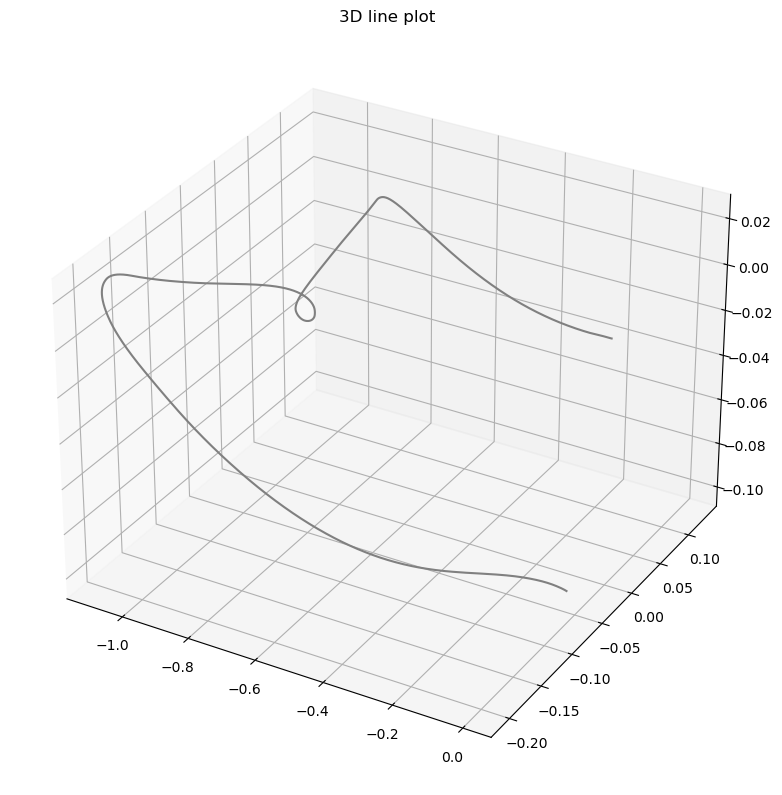

In [18]:
print(len(plot_center))

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10), dpi =100)
# 创建3d绘图区域
ax = plt.axes(projection='3d')

ax.plot3D(plot_center_x, plot_center_y, plot_center_z, 'gray')
ax.set_title('3D line plot')
plt.show()